In [1]:
import numpy as np
import cv2
import os
import PIL.Image as img
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 2.0 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.7 MB 469.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.7 MB 469.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.7 MB 504.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.7 MB 568.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 586.1 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 599.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 577.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 577.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 577.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 577.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 577.6 kB/s eta 0:00:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [3]:
IMAGE_SHAPE = (224, 224)

m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4", input_shape = IMAGE_SHAPE+(3,))
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000026D5592B250> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [4]:
import tf_keras as tfk

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tfk.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4", input_shape = IMAGE_SHAPE+(3,))
])

In [2]:
IMAGE_SHAPE = (224, 224)
IMAGE_SHAPE+(3,)

(224, 224, 3)

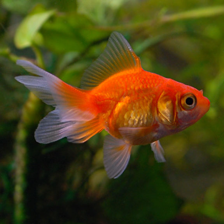

In [6]:
gold_fish = img.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [8]:
gold_fish.shape

(224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 5s 5s/step


array([[ 0.2210783 ,  2.049768  ,  9.622809  , ..., -1.4619291 ,
        -0.28230885, -0.25916258]], dtype=float32)

In [11]:
result.shape

(1, 1001)

In [12]:
pred = np.argmax(result)
pred

2

In [13]:
images_labels = []

with open('ImageNetLabels.txt') as f:
    images_labels = f.read().splitlines()

images_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
images_labels[pred]

'goldfish'

## Load Datasets

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [16]:
data_dir

'.\\datasets\\flower_photos'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
img_count =  len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [20]:
roses =  list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

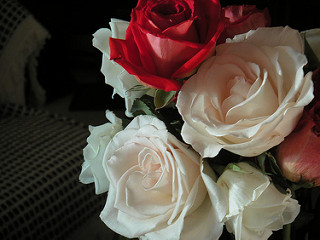

In [21]:
img.open(str(roses[1]))

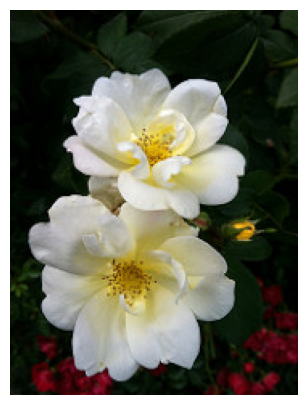

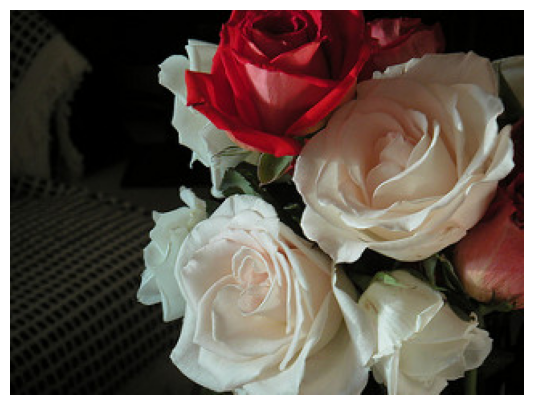

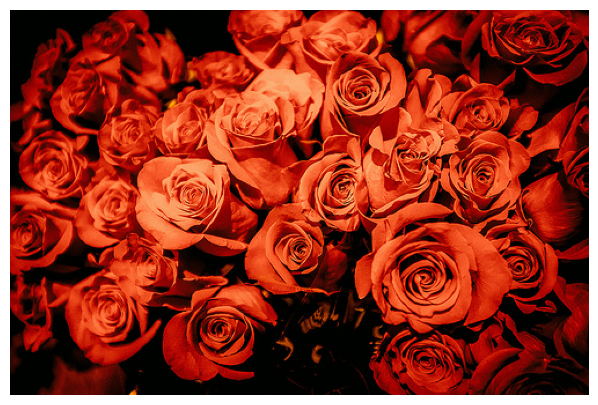

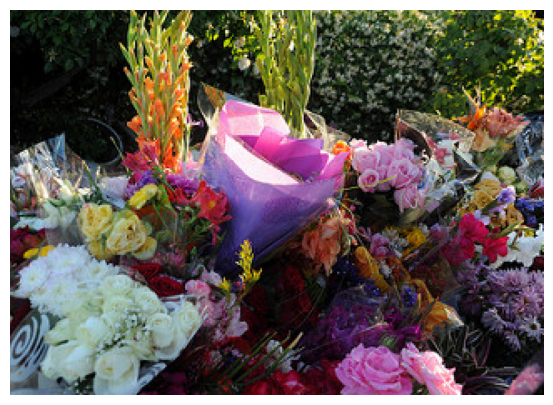

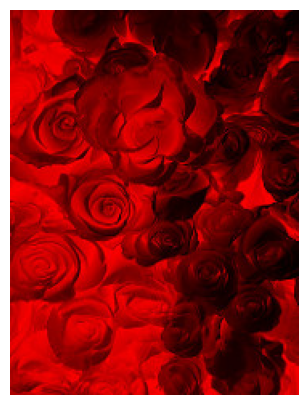

In [22]:
for i in range(0,5):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(img.open(str(roses[i])))
    plt.show

In [23]:
for i in range(0,5):
    print(f'index-{i}: {img.open(str(roses[i])).size}')

index-0: (179, 240)
index-1: (320, 240)
index-2: (500, 333)
index-3: (320, 231)
index-4: (180, 240)


In [24]:
flowers_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
}

In [25]:
flowers_dict['sunflowers']

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1

In [26]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'tulips': 3,
    'sunflowers': 4,
}

In [27]:
flowers_label_dict['roses']

0

In [28]:
flowers_dict.items()

dict_items([('roses', [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flowe

In [29]:
flowers_dict['sunflowers'][0]

WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

In [30]:
cv2.imread(str(flowers_dict['sunflowers'][0]))

array([[[ 42,  49,  34],
        [ 39,  49,  33],
        [ 39,  51,  33],
        ...,
        [ 13,  42,  16],
        [ 12,  41,  15],
        [ 12,  41,  15]],

       [[ 40,  48,  31],
        [ 37,  47,  30],
        [ 37,  49,  31],
        ...,
        [ 17,  43,  25],
        [ 16,  42,  24],
        [ 15,  41,  23]],

       [[ 38,  46,  29],
        [ 35,  45,  28],
        [ 36,  48,  28],
        ...,
        [ 19,  48,  25],
        [ 18,  48,  23],
        [ 17,  47,  22]],

       ...,

       [[ 31, 140,  91],
        [ 91, 142,  98],
        [ 82, 123,  95],
        ...,
        [ 49,  96,  47],
        [ 48,  95,  46],
        [ 48,  94,  47]],

       [[ 19, 141,  87],
        [ 52, 141,  98],
        [ 80, 123,  90],
        ...,
        [ 48,  97,  43],
        [ 50,  96,  44],
        [ 49,  92,  49]],

       [[ 19, 141,  87],
        [ 56, 145, 102],
        [ 90, 133, 100],
        ...,
        [ 48,  96,  44],
        [ 50,  94,  47],
        [ 47,  91,  50]]

In [31]:
images = cv2.imread(str(flowers_dict['sunflowers'][0]))
images.shape

(330, 500, 3)

In [32]:
r = cv2.resize(images, IMAGE_SHAPE)
r.shape

(224, 224, 3)

In [33]:
flowers_label_dict['roses']

0

In [34]:
x = []
y = []

for flower_name, i in flowers_dict.items():
    for j in i:
        images = cv2.imread(str(j))
        resize_img = cv2.resize(images,IMAGE_SHAPE)
        x.append(resize_img)
        y.append(flowers_label_dict[flower_name])

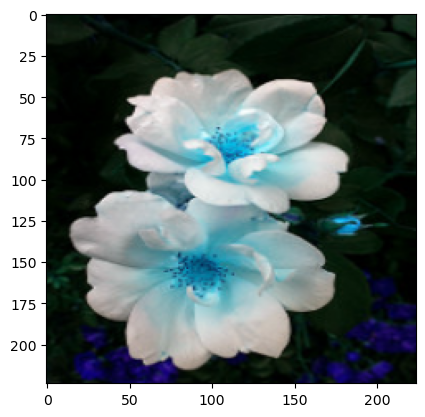

In [35]:
plt.imshow(x[0])

In [36]:
y[0]

0

In [37]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [38]:
x1 = np.array(x)
y1 = np.array(y)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1 ,test_size = 0.2, random_state = 42)

In [40]:
x_train.shape

(2936, 224, 224, 3)

In [41]:
x_test.shape

(734, 224, 224, 3)

In [42]:
y_train.shape

(2936,)

In [43]:
y_test.shape

(734,)

In [44]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [46]:
x_train_scaled.shape

(2936, 224, 224, 3)

In [45]:
x_train_scaled[0]

array([[[0.03921569, 0.49803922, 0.34509804],
        [0.04705882, 0.50196078, 0.35686275],
        [0.05882353, 0.51372549, 0.37254902],
        ...,
        [0.05098039, 0.29803922, 0.21176471],
        [0.05882353, 0.30196078, 0.21176471],
        [0.06666667, 0.30196078, 0.20784314]],

       [[0.01568627, 0.47058824, 0.3254902 ],
        [0.02745098, 0.48235294, 0.34117647],
        [0.03529412, 0.49411765, 0.36078431],
        ...,
        [0.03921569, 0.29019608, 0.19215686],
        [0.04705882, 0.28627451, 0.19215686],
        [0.05490196, 0.28627451, 0.19215686]],

       [[0.        , 0.43921569, 0.30196078],
        [0.00392157, 0.44705882, 0.31764706],
        [0.00392157, 0.45882353, 0.3372549 ],
        ...,
        [0.03137255, 0.2745098 , 0.17254902],
        [0.03137255, 0.27058824, 0.16862745],
        [0.03529412, 0.2627451 , 0.16862745]],

       ...,

       [[0.00392157, 0.34509804, 0.1372549 ],
        [0.        , 0.2745098 , 0.09411765],
        [0.        , 0

In [49]:
x[1].shape

(224, 224, 3)

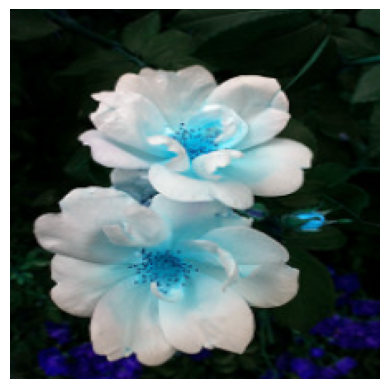

In [50]:
plt.axis('off')
plt.imshow(x[0])

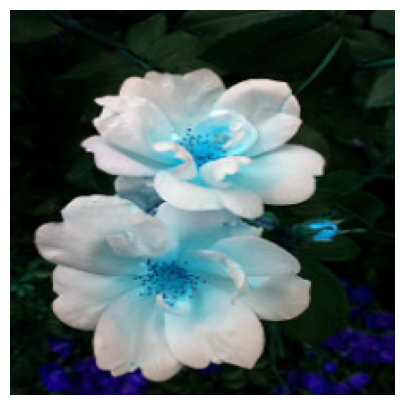

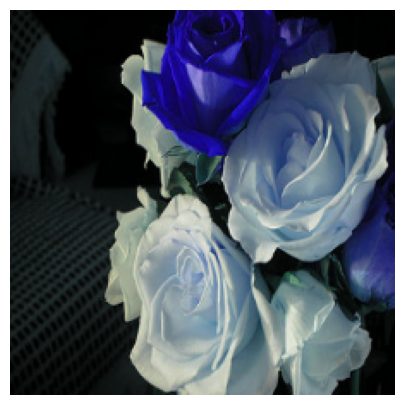

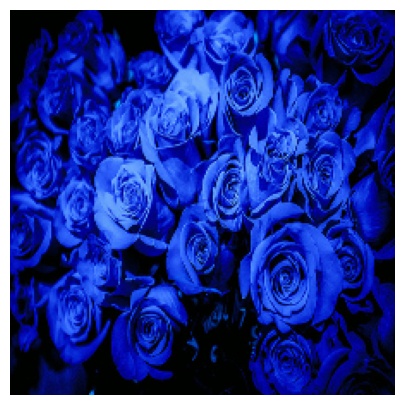

In [51]:
for i in range(0,3):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(x[i])

In [53]:
predicted = classifier.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 948ms/step


array([795, 880, 795], dtype=int64)

## Our 3 photos are Rose

In [55]:
h = []
for i in predicted:
    j = images_labels[i]
    h.append(j)

print(h)

['shower curtain', 'umbrella', 'shower curtain']


In [56]:
pre_trained = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-classification/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    pre_trained, input_shape = (224, 224, 3), trainable =  False)

In [57]:
model = tfk.Sequential([
   pretrained_model_without_top_layer,
   tfk.layers.Dense(5) 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 3545275 (13.52 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
92/92 [==============================] - 32s 316ms/step - loss: 0.6206 - acc: 0.7967
Epoch 2/5
92/92 [==============================] - 30s 326ms/step - loss: 0.3663 - acc: 0.8675
Epoch 3/5
92/92 [==============================] - 30s 322ms/step - loss: 0.2959 - acc: 0.8971
Epoch 4/5
92/92 [==============================] - 29s 320ms/step - loss: 0.2508 - acc: 0.9152
Epoch 5/5
92/92 [==============================] - 29s 317ms/step - loss: 0.2214 - acc: 0.9261


In [60]:
model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 9s 316ms/step - loss: 0.4041 - acc: 0.8597


[0.40413397550582886, 0.859673023223877]

In [61]:
pred = model.predict(x_test_scaled)

23/23 [==============================] - 8s 336ms/step


In [62]:
pred[:5]

array([[ -4.9404097, -11.108292 , -13.427661 ,  -9.087352 , -10.137237 ],
       [ -5.966484 ,  -5.9967184, -10.281716 ,  -3.3725245, -14.107068 ],
       [-10.040889 ,  -8.452477 , -11.408925 , -11.856793 ,  -3.4226224],
       [-11.910164 ,  -1.556513 ,  -7.325809 ,  -9.486045 ,  -9.003083 ],
       [-14.125166 ,  -4.771289 , -10.902482 , -14.446853 , -10.451766 ]],
      dtype=float32)

In [63]:
y_pred = [np.argmax(i) for i in pred]
y_pred[:5]

[0, 3, 4, 1, 1]

In [64]:
y_test[:5]

array([0, 3, 4, 1, 1])

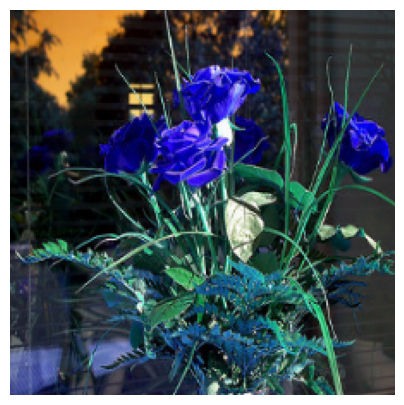

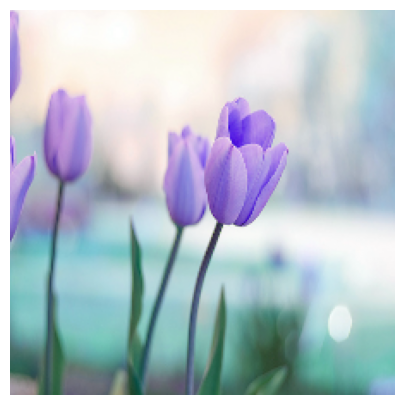

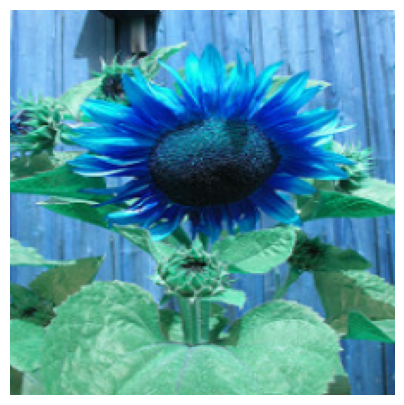

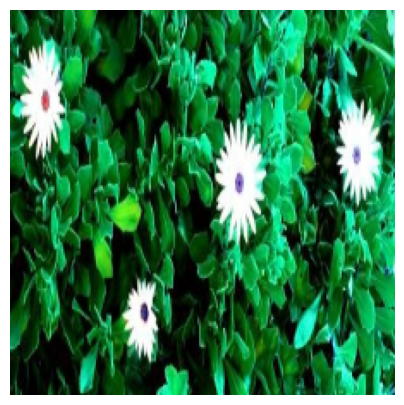

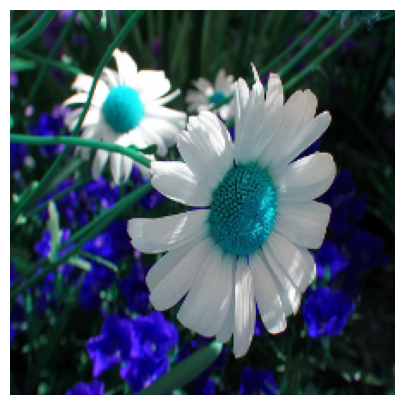

In [68]:
for i in range(0,5):
    plt.figure(figsize=(12,5))
    plt.axis('off')
    plt.imshow(x_test_scaled[i])

In [72]:
flowers_label_dict['roses']

0

In [74]:
flowers_list = ['roses', 'daisy', 'dandelion','tulips', 'sunflowers']
flower = []

for i in y_pred[:5]:
    j = flowers_list[i]
    flower.append(j)

print(flower)


['roses', 'tulips', 'sunflowers', 'daisy', 'daisy']


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       150
           1       0.85      0.84      0.84       126
           2       0.87      0.92      0.90       172
           3       0.87      0.80      0.84       143
           4       0.89      0.81      0.85       143

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

